# Keras - Chat ou pas ?

Dataset emprunté au cours [Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome) d'Andrew Ng.

Vous devez télécharger également les répertoires `datasets/` et `images/` pour que ce notbook fonctionne

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
from keras.models import Sequential
from keras.layers import Dense

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)
%config InlineBackend.figure_format = 'retina'

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\paull\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['acc']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_acc' in history.history:
        val_acc = history.history['val_acc']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()


def load_cat_data():
    """Load the cat vs non-cat dataset"""

    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(
        train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(
        test_dataset["test_set_y"][:])  # your test set labels

    # the list of classes
    classes_list = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes_list

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
Original images shape: (209, 64, 64, 3)
Original labels shape: (1, 209)
[[[122 104  65]
  [124 105  66]
  [125 106  68]
  ..., 
  [138 104  74]
  [121  88  64]
  [ 87  57  47]]

 [[124 107  66]
  [126 108  68]
  [126 107  68]
  ..., 
  [145 113  86]
  [137 105  87]
  [119  86  80]]

 [[125 107  65]
  [127 107  67]
  [128 106  68]
  ..., 
  [151 117  98]
  [148 117 105]
  [138 108 105]]

 ..., 
 [[145 118  98]
  [140 109  91]
  [133  93  79]
  ..., 
  [144 105 125]
  [153 124 139]
  [136 101 115]]

 [[114  70  64]
  [107  64  59]
  [109  61  56]
  ..., 
  [150 120 136]
  [156 133 142]
  [156 135 138]]

 [[102  51  53]
  [112  61  60]
  [110  52  53]
  ..., 
  [148 119 132]
  [135 106 116]
  [146 124 128]]]
y = 1. It's a cat picture.


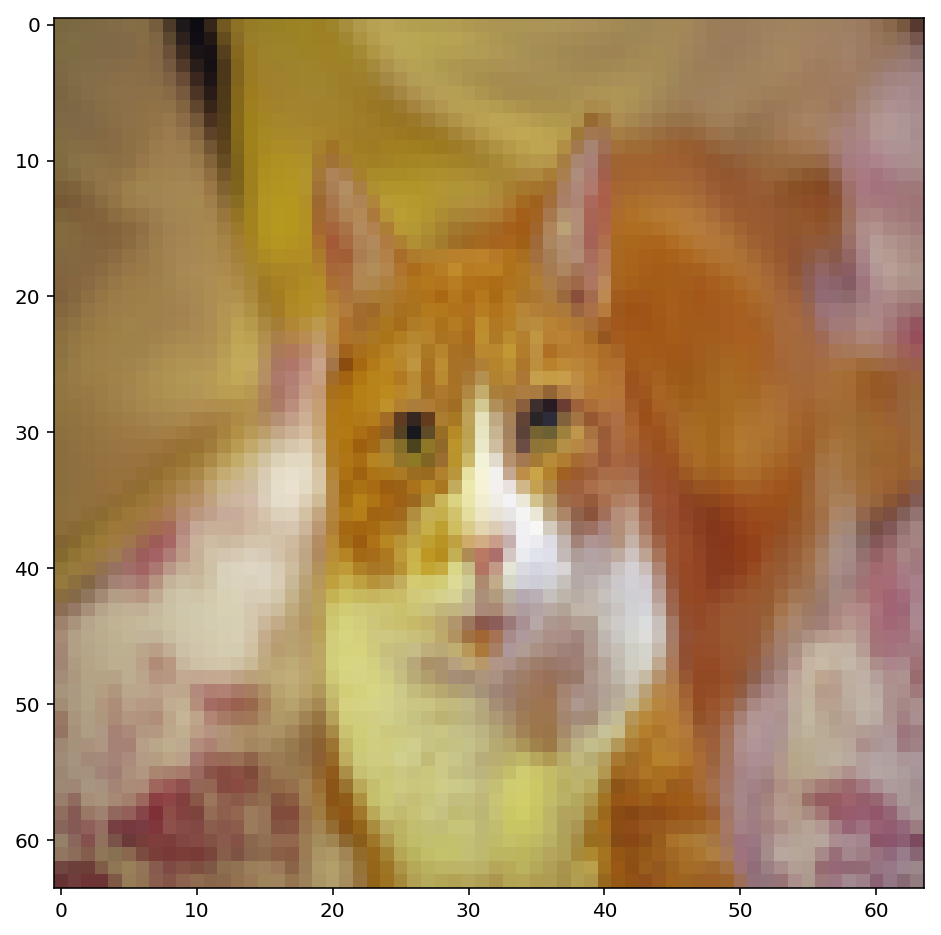

In [6]:
# Load cat vs nont-cat dataset
train_images, train_labels, test_images, test_labels, classes = load_cat_data()

# Explore the dataset
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("Original images shape: " + str(train_images.shape))
print("Original labels shape: " + str(train_labels.shape))

# Example of a picture
index = 24
plt.imshow(train_images[index])
print(train_images[index])
print("y = " + str(train_labels[0, index]) + ". It's a " +
      classes[train_labels[0, index]].decode("utf-8") + " picture.")

In [4]:
# Reshape the training and test examples
# The "-1" makes reshape flatten the remaining dimensions
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_images = train_images_flatten / 255.
test_images = test_images_flatten / 255.

print("train_images shape: " + str(train_images.shape))
print("test_images shape: " + str(test_images.shape))

# Transpose labels so that samples are on first axis and feetures on second
train_labels = train_labels.T
test_labels = test_labels.T

train_images shape: (209, 12288)
test_images shape: (50, 12288)


## Question 1

* Entraînez un réseau de neurones à partir des images d'entraînement
* Affichez son accuracy sur les images de test
* Tracez la courbe loss/epochs de l'apprentissage

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 61445     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 61,516
Trainable params: 61,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
209/209 [==============================] - 78s 374ms/step - loss: 0.6761 - acc: 0.6077


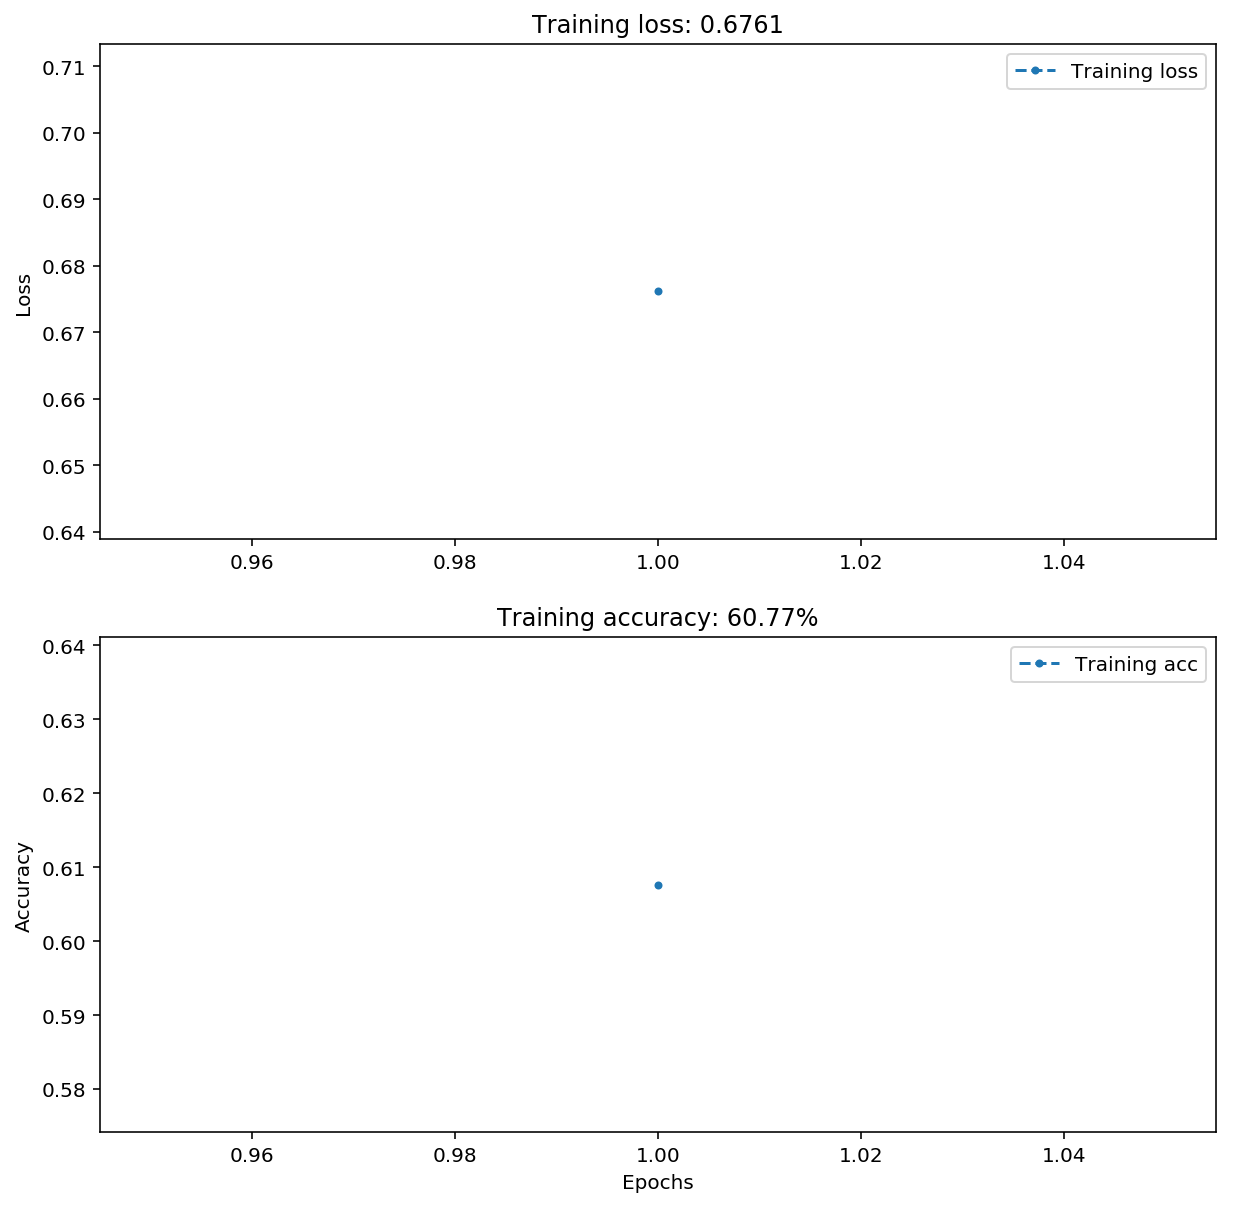

In [5]:
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(num_px * num_px * 3,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=1, batch_size=20)
plot_loss_acc(history)

## Question 2

Faites varier l'architecture du réseau pour atteindre une accuracy d'entraînement > 75%.

## Question 3

Testez le réseau sur votre propre image de chat !

Votre image doit se trouver dans le sous-répertoire `images/` de ce notebook. Cliquez sur le menu **File->Open** pour l'ajouter.

In [ ]:
# TODO
my_image = "my_image.jpg" # Name of image file
my_label_y = [1] # Class of image file (1 -> cat, 0 -> non-cat)
# END TODO

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1)).T
my_predicted_image = model.predict(my_image)

plt.imshow(image)
print("Is it a cat? " + str(np.squeeze(my_predicted_image) > 0.5))